# Tensor and Variable
这是 PyTorch 基础的第二课，通过本次课程，你能够学会如何像使用 NumPy 一样使用 PyTorch，了解到 PyTorch 中的基本元素 Tensor 和 Variable 及其操作方式。

## 把 PyTorch 当做 NumPy 用
PyTorch 的官方介绍是一个拥有强力GPU加速的张量和动态构建网络的库，其主要构件是张量，所以我们可以把 PyTorch 当做 NumPy 来用，PyTorch 的很多操作好 NumPy 都是类似的，但是因为其能够在 GPU 上运行，所以有着比 NumPy 快很多倍的速度。

In [1]:
import torch
import numpy as np

In [2]:
# 创建一个 numpy ndarray
numpy_tensor = np.random.randn(10, 20)

我们可以使用下面两种方式将numpy的ndarray转换到tensor上

In [3]:
pytorch_tensor1 = torch.Tensor(numpy_tensor)
pytorch_tensor2 = torch.from_numpy(numpy_tensor)

使用以上两种方法进行转换的时候，会直接将 NumPy ndarray 的数据类型转换为对应的 PyTorch Tensor 数据类型

同时我们也可以使用下面的方法将 pytorch tensor 转换为 numpy ndarray

In [4]:
# 如果 pytorch tensor 在 cpu 上
numpy_array = pytorch_tensor1.numpy()

# 如果 pytorch tensor 在 gpu 上
numpy_array = pytorch_tensor1.cpu().numpy()

需要注意 GPU 上的 Tensor 不能直接转换为 NumPy ndarray，需要使用`.cpu()`先将 GPU 上的 Tensor 转到 CPU 上

PyTorch Tensor 使用 GPU 加速

我们可以使用以下两种方式将 Tensor 放到 GPU 上

In [ ]:
# 第一种方式是定义 cuda 数据类型
dtype = torch.cuda.FloatTensor # 定义默认 GPU 的 数据类型
gpu_tensor = torch.randn(10, 20).type(dtype)

# 第二种方式更简单，推荐使用
gpu_tensor = torch.randn(10, 20).cuda(0) # 将 tensor 放到第一个 GPU 上
gpu_tensor = torch.randn(10, 20).cuda(1) # 将 tensor 放到第二个 GPU 上

使用第一种方式将 tensor 放到 GPU 上的时候会将数据类型转换成定义的类型，而是用第二种方式能够直接将 tensor 放到 GPU 上，类型跟之前保持一致

推荐在定义 tensor 的时候就明确数据类型，然后直接使用第二种方法将 tensor 放到 GPU 上

而将 tensor 放回 CPU 的操作非常简单

In [ ]:
cpu_tensor = gpu_tensor.cpu()

我们也能够访问到 Tensor 的一些属性

In [5]:
# 可以通过下面两种方式得到 tensor 的大小
print(pytorch_tensor1.shape)
print(pytorch_tensor1.size())

torch.Size([10, 20])
torch.Size([10, 20])


In [6]:
# 得到 tensor 的数据类型
print(pytorch_tensor1.type())

torch.FloatTensor


In [7]:
# 得到 tensor 的维度
print(pytorch_tensor1.dim())

2


In [8]:
# 得到 tensor 的所有元素个数
print(pytorch_tensor1.numel())

200


**小练习**

查阅以下[文档](http://pytorch.org/docs/0.3.0/tensors.html)了解 tensor 的数据类型，创建一个 float64、大小是 3 x 2、随机初始化的 tensor，将其转化为 numpy 的 ndarray，输出其数据类型

参考输出: float64

In [6]:
# 答案
x = torch.randn(3, 2)
x = x.type(torch.DoubleTensor)
x_array = x.numpy()
print(x_array.dtype)

float64


## Tensor的操作
Tensor 操作中的 api 和 NumPy 非常相似，如果你熟悉 NumPy 中的操作，那么 tensor 基本是一致的，下面我们来列举其中的一些操作

In [9]:
x = torch.ones(2, 2)
print(x) # 这是一个float tensor


 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [10]:
print(x.type())

torch.FloatTensor


In [11]:
# 将其转化为整形
x = x.long()
# x = x.type(torch.LongTensor)
print(x)


 1  1
 1  1
[torch.LongTensor of size 2x2]



In [12]:
# 再将其转回 float
x = x.float()
# x = x.type(torch.FloatTensor)
print(x)


 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [13]:
x = torch.randn(4, 3)
print(x)


-0.8203 -0.0328  1.8283
-0.1734 -0.1873  0.9818
-1.8368 -2.2450 -0.4410
-0.8005 -2.1132  0.7140
[torch.FloatTensor of size 4x3]



In [14]:
# 沿着行取最大值
max_value, max_idx = torch.max(x, dim=1)

In [15]:
# 每一行的最大值
max_value


 1.8283
 0.9818
-0.4410
 0.7140
[torch.FloatTensor of size 4]

In [16]:
# 每一行最大值的下标
max_idx


 2
 2
 2
 2
[torch.LongTensor of size 4]

In [17]:
# 沿着行对 x 求和
sum_x = torch.sum(x, dim=1)
print(sum_x)


 0.9751
 0.6212
-4.5228
-2.1997
[torch.FloatTensor of size 4]



In [18]:
# 增加维度或者减少维度
print(x.shape)
x = x.unsqueeze(0) # 在第一维增加
print(x.shape)

torch.Size([4, 3])
torch.Size([1, 4, 3])


In [19]:
x = x.unsqueeze(1) # 在第二维增加
print(x.shape)

torch.Size([1, 1, 4, 3])


In [20]:
x = x.squeeze(0) # 减少第一维
print(x.shape)

torch.Size([1, 4, 3])


In [21]:
x = x.squeeze() # 将 tensor 中所有的一维全部都去掉
print(x.shape)

torch.Size([4, 3])


In [22]:
x = torch.randn(3, 4, 5)
print(x.shape)

# 使用permute和transpose进行维度交换
x = x.permute(1, 0, 2) # permute 可以重新排列 tensor 的维度
print(x.shape)

x = x.transpose(0, 2)  # transpose 交换 tensor 中的两个维度
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([4, 3, 5])
torch.Size([5, 3, 4])


In [23]:
# 使用 view 对 tensor 进行 reshape
x = torch.randn(3, 4, 5)
print(x.shape)

x = x.view(-1, 5) # -1 表示任意的大小，5 表示第二维变成 5
print(x.shape)

x = x.view(3, 20) # 重新 reshape 成 (3, 20) 的大小
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([12, 5])
torch.Size([3, 20])


In [24]:
x = torch.randn(3, 4)
y = torch.randn(3, 4)

# 两个 tensor 求和
z = x + y
# z = torch.add(x, y)

另外，pytorch中大多数的操作都支持 inplace 操作，也就是可以直接对 tensor 进行操作而不需要另外开辟内存空间，方式非常简单，一般都是在操作的符号后面加`_`，比如

In [25]:
x = torch.ones(3, 3)
print(x.shape)

# unsqueeze 进行 inplace
x.unsqueeze_(0)
print(x.shape)

# transpose 进行 inplace
x.transpose_(1, 0)
print(x.shape)

torch.Size([3, 3])
torch.Size([1, 3, 3])
torch.Size([3, 1, 3])


In [ ]:
x = torch.ones(3, 3)
y = torch.ones(3, 3)
print(x)

# add 进行 inplace
x.add_(y)
print(x)

**小练习**

访问[文档](http://pytorch.org/docs/0.3.0/tensors.html)了解 tensor 更多的 api，实现下面的要求

创建一个 float32、4 x 4 的全为1的矩阵，将矩阵正中间 2 x 2 的矩阵，全部修改成2

参考输出
$$
\left[
\begin{matrix}
1 & 1 & 1 & 1 \\
1 & 2 & 2 & 1 \\
1 & 2 & 2 & 1 \\
1 & 1 & 1 & 1
\end{matrix}
\right] \\
[torch.FloatTensor\ of\ size\ 4x4]
$$

In [10]:
# 答案
x = torch.ones(4, 4).float()
x[1:3, 1:3] = 2
print(x)


 1  1  1  1
 1  2  2  1
 1  2  2  1
 1  1  1  1
[torch.FloatTensor of size 4x4]



## Variable
tensor 是 PyTorch 中的完美组件，但是构建神经网络还远远不够，我们需要能够构建计算图的 tensor，这就是 Variable。Variable 是对 tensor 的封装，操作和 tensor 是一样的，但是每个 Variabel都有三个属性，Variable 中的 tensor本身`.data`，对应 tensor 的梯度`.grad`以及这个 Variable 是通过什么方式得到的`.grad_fn`

In [21]:
# 通过下面这种方式导入 Variable
from torch.autograd import Variable

In [28]:
x_tensor = torch.randn(10, 5)
y_tensor = torch.randn(10, 5)

# 将 tensor 变成 Variable
x = Variable(x_tensor, requires_grad=True) # 默认 Variable 是不需要求梯度的，所以我们用这个方式申明需要对其进行求梯度
y = Variable(y_tensor, requires_grad=True)

In [29]:
z = torch.sum(x + y)

In [30]:
print(z.data)
print(z.grad_fn)


-2.1379
[torch.FloatTensor of size 1]



上面我们打出了 z 中的 tensor 数值，同时通过`grad_fn`知道了其是通过 Sum 这种方式得到的

In [31]:
# 求 x 和 y 的梯度
z.backward()

print(x.grad)
print(y.grad)

Variable containing:
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
[torch.FloatTensor of size 10x5]

Variable containing:
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
[torch.FloatTensor of size 10x5]



通过`.grad`我们得到了 x 和 y 的梯度，这里我们使用了 PyTorch 提供的自动求导机制，非常方便，下一小节会具体讲自动求导。

**小练习**

尝试构建一个函数 $y = x^2 $，然后求 x=2 的导数。

参考输出：4

提示：

$y = x^2$的图像如下

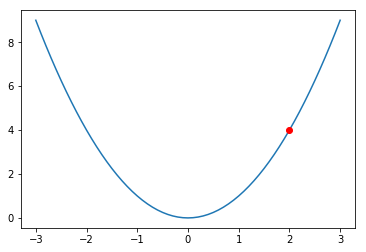

In [20]:
import matplotlib.pyplot as plt
x = np.arange(-3, 3.01, 0.1)
y = x ** 2
plt.plot(x, y)
plt.plot(2, 4, 'ro')
plt.show()

In [26]:
# 答案
x = Variable(torch.FloatTensor([2]), requires_grad=True)
y = x ** 2
y.backward()
print(x.grad)

Variable containing:
 4
[torch.FloatTensor of size 1]



下一次课程我们将会从导数展开，了解 PyTorch 的自动求导机制